### Question : 2

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min, adjusted_rand_score, pairwise_distances, rand_score
from scipy.stats import mode
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics.cluster import pair_confusion_matrix
from sklearn.metrics import confusion_matrix

### Processing the Training and Testing Data

In [2]:
data = scipy.io.loadmat('train_32x32.mat')
X = data['X'].T 
y = data['y']
X_train = np.empty((0, 3, 32, 32), dtype=X.dtype)
y_train = np.empty((0, 1), dtype=y.dtype)

for i in range(1,11):
    ind = np.where(y == i)[0]
    indices = ind[:2500]
    X_train = np.append(X_train, X[indices], axis=0)
    y_train = np.append(y_train, y[indices])

In [3]:
data = scipy.io.loadmat('test_32x32.mat')
X_test = data['X'].T
y_test = data['y']

In [4]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

(a) Perform k means clustering with k=10 on the raw data and on data obtained after PCA
dimensionality reduction for dimension as found in question 1 (a) and for dimension 10as in question 1 (b). You may use only training data of SVHN to perform this. Do you
observe images from the same class to be clustered together ? For each cluster, provide
the image closest to the centroid.

Note : To check whether the data points from the same class are clustered together or not, we take the most frequent element in the cluster to be the label of the cluster. 

In [5]:
scalar = StandardScaler()
X_train_std = X_train
X_test_std =X_test
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [6]:
# Raw Data

kmeans = KMeans(n_clusters = 10,n_init=10, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [7]:
for label in np.unique(kmeans.labels_):
    idx = np.where(kmeans.labels_ == label)[0]
    labels = y_train[idx].ravel()
    print("The cluster ", label,"has clustered the data points with variance in their true labels ", np.var(labels))

The cluster  0 has clustered the data points with variance in their true labels  8.10383991876893
The cluster  1 has clustered the data points with variance in their true labels  8.116522073705514
The cluster  2 has clustered the data points with variance in their true labels  8.426410469841121
The cluster  3 has clustered the data points with variance in their true labels  8.06521032283291
The cluster  4 has clustered the data points with variance in their true labels  7.964898531130827
The cluster  5 has clustered the data points with variance in their true labels  8.082194071485183
The cluster  6 has clustered the data points with variance in their true labels  7.551792401984495
The cluster  7 has clustered the data points with variance in their true labels  8.318463505986582
The cluster  8 has clustered the data points with variance in their true labels  7.9990392173989
The cluster  9 has clustered the data points with variance in their true labels  8.648342889164901


Since each of the clusters have clusters the data points with very high variance (8.5 for the data points that range from 0 to 9), We say that the images from the same class are not clustered together. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

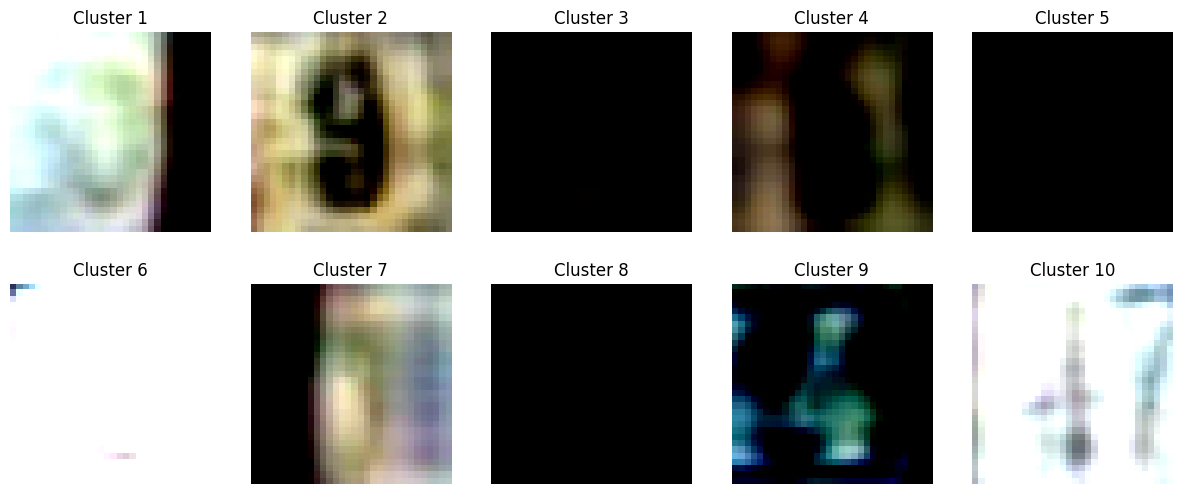

In [8]:
# Images closest to the centroid in each of the clusters
centers = kmeans.cluster_centers_
indices, _ = pairwise_distances_argmin_min(centers, X_train)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(len(indices)):
    idx = indices[i]
    axes[i].imshow(X_train[idx].reshape(3, 32, 32).T)
    axes[i].set_title(f'Cluster {i+1}')
    axes[i].axis('off')
plt.show()


In [9]:
# Data obtained after PCA dimensionality reduction for dimension as found in part 1(a)
eigen_num = 27 

pca = PCA( n_components = eigen_num)
X_train_pca1 = pca.fit_transform(X_train)
X_test_pca1 = pca.transform(X_test)

kmeans1 = KMeans(n_clusters = 10,n_init=10, random_state=42)
kmeans1.fit(X_train_pca1)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [10]:
for label in np.unique(kmeans1.labels_):
    idx = np.where(kmeans1.labels_ == label)[0]
    labels = y_train[idx].ravel()
    print("The cluster ", label,"has clustered the data points with variance in their true labels ", np.var(labels))

The cluster  0 has clustered the data points with variance in their true labels  8.593306551368906
The cluster  1 has clustered the data points with variance in their true labels  8.094918688107064
The cluster  2 has clustered the data points with variance in their true labels  7.939560179508608
The cluster  3 has clustered the data points with variance in their true labels  8.004623785093562
The cluster  4 has clustered the data points with variance in their true labels  8.193515323974658
The cluster  5 has clustered the data points with variance in their true labels  8.376324332417967
The cluster  6 has clustered the data points with variance in their true labels  8.32571204353236
The cluster  7 has clustered the data points with variance in their true labels  7.989234290779872
The cluster  8 has clustered the data points with variance in their true labels  8.097144753799517
The cluster  9 has clustered the data points with variance in their true labels  7.671243913812902


Since each of the clusters have clusters the data points with very high variance (8.5 for the data points that range from 0 to 9), We say that the images from the same class are not clustered together. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

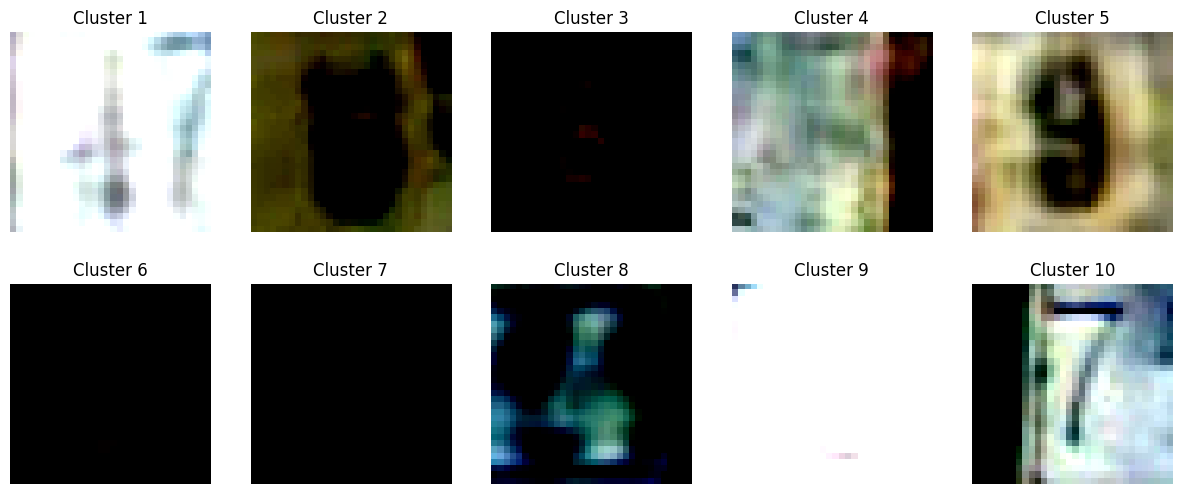

In [11]:
# Images closest to the centroid in each of the clusters
centers = kmeans1.cluster_centers_
indices, _ = pairwise_distances_argmin_min(centers, X_train_pca1)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(len(indices)):
    idx = indices[i]
    axes[i].imshow(X_train[idx].reshape(3, 32, 32).T)
    axes[i].set_title(f'Cluster {i+1}')
    axes[i].axis('off')
plt.show()

In [12]:
# Data obtained after PCA dimensionality reduction for dimension 10 as in part 1(b)

eigen_num = 10

pca = PCA( n_components = eigen_num)
X_train_pca2 = pca.fit_transform(X_train)
X_test_pca2 = pca.transform(X_test)

kmeans2 = KMeans(n_clusters = 10,n_init=10, random_state=42)
kmeans2.fit(X_train_pca2)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [13]:
for label in np.unique(kmeans2.labels_):
    idx = np.where(kmeans2.labels_ == label)[0]
    labels = y_train[idx].ravel()
    print("The cluster ", label,"has clustered the data points with variance in their true labels ", np.var(labels))

The cluster  0 has clustered the data points with variance in their true labels  8.001785530159822
The cluster  1 has clustered the data points with variance in their true labels  8.070058524499123
The cluster  2 has clustered the data points with variance in their true labels  8.09794533466961
The cluster  3 has clustered the data points with variance in their true labels  7.956992972854923
The cluster  4 has clustered the data points with variance in their true labels  8.12042446428136
The cluster  5 has clustered the data points with variance in their true labels  8.310494485433416
The cluster  6 has clustered the data points with variance in their true labels  8.430443074338687
The cluster  7 has clustered the data points with variance in their true labels  8.12475246525866
The cluster  8 has clustered the data points with variance in their true labels  8.629817228357439
The cluster  9 has clustered the data points with variance in their true labels  7.576736363636363


Since each of the clusters have clusters the data points with very high variance (8.5 for the data points that range from 0 to 9), We say that the images from the same class are not clustered together. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

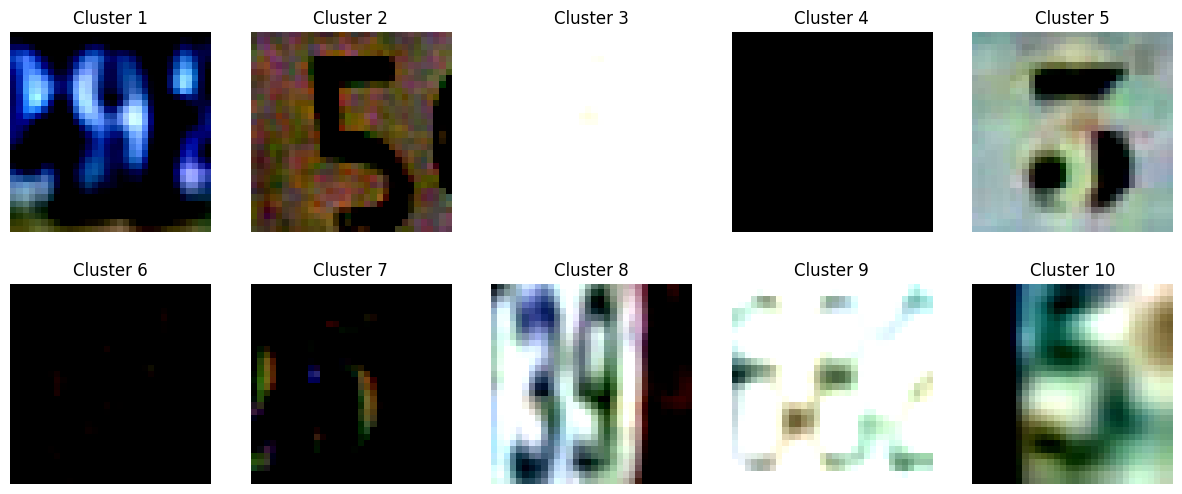

In [14]:
# Images closest to the centroid in each of the clusters
centers = kmeans2.cluster_centers_
indices, _ = pairwise_distances_argmin_min(centers, X_train_pca2)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(len(indices)):
    idx = indices[i]
    axes[i].imshow(X_train[idx].reshape(3, 32, 32).T)
    axes[i].set_title(f'Cluster {i+1}')
    axes[i].axis('off')
plt.show()

(b) Find the sum squared error for each of these different clustering obtained in 2 (a). Make
use of the label information associated with the images to evaluate your
clustering.Specifically, evaluate the goodness of your clusters for various cases in 2 (a)
by using two evaluation metrics purity and rand-index.

In [15]:
# Raw Data 
# print(X_test.shape)
# print(X_test_pca1.shape)
y_pred = kmeans.predict(X_test)
y_test = y_test.flatten()
y_pred = y_pred.flatten()
# sse = mean_squared_error(y_test, y_pred) * len(y_test)
sse = kmeans.inertia_
print("Sum squared Error : ", sse)

# confusion_matrix = pair_confusion_matrix(y_test, y_pred)
# purity = np.sum(np.max(confusion_matrix, axis=0)) / np.sum(confusion_matrix)
conf_mat = confusion_matrix(y_test, y_pred)
purity = np.sum(np.max(conf_mat, axis=0)) / np.sum(conf_mat)
print("Purity : ", purity)

rand_index = adjusted_rand_score(y_test, y_pred)
print("rand-index : ", rand_index)

Sum squared Error :  31534499.90655589
Purity :  0.19629686539643515
rand-index :  -9.703968335808583e-06


In [16]:
# Data obtained after PCA dimensionality reduction for dimension as found in part 1(a)

y_pred1 = kmeans1.predict(X_test_pca1)
y_pred1 = y_pred1.flatten()
# sse = mean_squared_error(y_test, y_pred1) * len(y_test)
SSE = kmeans1.inertia_
# print(SSE)
print("Sum squared Error : ", SSE)

# conf_matrix = pair_confusion_matrix(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
purity = np.sum(np.max(conf_matrix, axis=0)) / np.sum(conf_matrix)
# purity /= len(y_pred) 
print("Purity : ", purity)

rand_index = adjusted_rand_score(y_test, y_pred1)
print("rand-index : ", rand_index)

Sum squared Error :  24031320.395560242
Purity :  0.1971419791026429
rand-index :  6.291494712316204e-05


In [17]:
# Data obtained after PCA dimensionality reduction for dimension 10 as in part 1(b)

y_pred2 = kmeans2.predict(X_test_pca2)
y_pred2 = y_pred2.flatten()
# sse = mean_squared_error(y_test, y_pred2) * len(y_test)
sse = kmeans2.inertia_
print("Sum squared Error : ", sse)

# confusion_matrix = pair_confusion_matrix(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)
purity = np.sum(np.max(conf_matrix, axis=0)) / np.sum(conf_matrix)
print("Purity : ", purity)

rand_index = adjusted_rand_score(y_test, y_pred2)
print("rand-index : ", rand_index)

Sum squared Error :  17701768.922367264
Purity :  0.1963736939151813
rand-index :  -3.634447292991772e-06


(c) If you label each cluster with the digit that occurs most frequently within it, then what is
your classification accuracy with this unsupervised method for various cases ? How
does this compare with the accuracy you got with the K-NN classifier in Q1 (c) ?

In [18]:
# Raw Data

y_pred = np.zeros_like(y_train)

for label in np.unique(kmeans.labels_):
    idx = np.where(kmeans.labels_ == label)[0]
    labels = y_train[idx].ravel()
    for i in idx:
        y_pred[i] = mode(labels).mode

accuracy = accuracy_score(y_train, y_pred)
print("Classification Accuracy: ", accuracy)

Classification Accuracy:  0.1158


In [19]:
# Data obtained after PCA dimensionality reduction for dimension as found in part 1(a)

y_pred1 = np.zeros_like(y_train)

for label in np.unique(kmeans1.labels_):
    idx = np.where(kmeans1.labels_ == label)[0]
    labels = y_train[idx].ravel()
    for i in idx:
        y_pred1[i] = mode(labels).mode

accuracy = accuracy_score(y_train, y_pred1)
print("Classification Accuracy: ", accuracy)

Classification Accuracy:  0.11564


In [20]:
# Data obtained after PCA dimensionality reduction for dimension 10 as in part 1(b)

y_pred2 = np.zeros_like(y_train)

for label in np.unique(kmeans2.labels_):
    idx = np.where(kmeans2.labels_ == label)[0]
    labels = y_train[idx].ravel()
    for i in idx:
        y_pred2[i] = mode(labels).mode

accuracy = accuracy_score(y_train, y_pred2)
print("Classification Accuracy: ", accuracy)

Classification Accuracy:  0.11624


We are getting the classification accuracy less than the one wiht the K-NN classifier in Q1 (c) for all the cases, k = 5 or 7 and the raw data, PCA with dimension in 1(a) and 1(b). 

However, the classification accuracy in K-Means has not changed much for raw data, PCA reduced data in case 1a and 1b.  
They are  
For K = 10  
0.115  
0.115  
0.116  
  
For KNN, we can see that the accuracy is not changed much for raw data and PCA reduced data in case 1a, for case 1b we can see that the accuracy is changed by a noticable amount  
They are  
For K = 5  
0.402   
0.399   
0.252   
  
For K = 7  
0.411  
0.410  
0.260  

(d) Perform k means clustering with k=5 on data obtained after PCA dimensionality
reduction for dimension as found in question 1 (a). Find the sum squared error for each
of these cases. Do you observe images from different classes to be clustered together ?
which all classes do you find are getting clustered together.

In [21]:
# Data obtained after PCA dimensionality reduction for dimension as found in part 1(a)

kmeans3 = KMeans(n_clusters = 5,n_init=10, random_state=42)
kmeans3.fit(X_train_pca1)

y_pred3 = kmeans3.predict(X_train_pca1)
y_pred3 = y_pred3.flatten()
sse = mean_squared_error(y_train, y_pred3) * len(y_test)
print("Sum squared Error : ", sse)

for label in np.unique(kmeans3.labels_):
    idx = np.where(kmeans3.labels_ == label)[0]
    labels = y_train[idx].ravel()
    freq = {}
    for i in labels:
        if i not in freq:
            freq[i] = 1 
        else:
            freq[i] += 1 
    
    mode1, count1 = None, float('-inf')
    mode2, count2 = None, float('-inf')

    for key, value in freq.items():
        if value > count1:
            mode2, count2 = mode1, count1
            mode1, count1 = key, value
        elif value > count2:
            mode2, count2 = key, value

    print("The cluster ", label,"has clustered the data points with labels mostly", mode1, "with count", count1, " and ", mode2, "with count", count2)

Sum squared Error :  544064.63488
The cluster  0 has clustered the data points with labels mostly 7 with count 520  and  5 with count 494
The cluster  1 has clustered the data points with labels mostly 2 with count 536  and  10 with count 481
The cluster  2 has clustered the data points with labels mostly 6 with count 225  and  1 with count 221
The cluster  3 has clustered the data points with labels mostly 9 with count 749  and  2 with count 734
The cluster  4 has clustered the data points with labels mostly 8 with count 677  and  10 with count 671


From the above data, we can observe that mostly the classes with labels 2 and 0; 8 and 0; 1 and 6; 2 and 9; 7and 5 are being grouped into a clustered and the remaining classes are being scattered.  
Note: In our case, class 10 would mean that class 0.  
i.e, Class with digit images labelled '0' 